In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
# import plotly.offline as py#visualization
# py.init_notebook_mode(connected=True)#visualization
# import plotly.graph_objs as go#visualization
# import plotly.tools as tls#visualization
# import plotly.figure_factory as ff#visualization
pd.set_option('display.max_columns', None)

<ul>
<li>[Part 1: Data Exploration]
<li>[Part 2: Feature Preprocessing]
<li>[Part 3: Model Training and Results Evaluation]
<li>[Part 4: Feature Selection]
</ul>

In [2]:
telcom = pd.read_csv("WA_FnUseC_TelcoCustomerChurn.csv")
#first few rows
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
print ("Rows     : " ,telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])
print ("\nFeatures : \n" ,telcom.columns.tolist())
print ("\nMissing values :  ", telcom.isnull().sum())
print ("\nUnique values :  \n",telcom.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents     

In [5]:
telcom[['TotalCharges']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
TotalCharges    7043 non-null object
dtypes: object(1)
memory usage: 55.1+ KB


In [6]:
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)

In [19]:
telcom['tenure'] .isnull().sum()

0

In [8]:
# variable: TotalCharges

#Replacing spaces with null values in total charges column
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column which contain .15% missing data 
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]

#convert to float type
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
print('categorical columns',cat_cols)
#numerical columns
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]
print('numerical columns',num_cols)
#Binary columns with 2 values
bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
print('binary columns',bin_cols)
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]
print('multi columns',multi_cols)

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])

#Duplicating columns for multi value columns
telcom = pd.get_dummies(data = telcom,columns = multi_cols )

categorical columns ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
numerical columns ['tenure', 'MonthlyCharges', 'TotalCharges']
binary columns ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
multi columns ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


<Figure size 1440x1080 with 0 Axes>

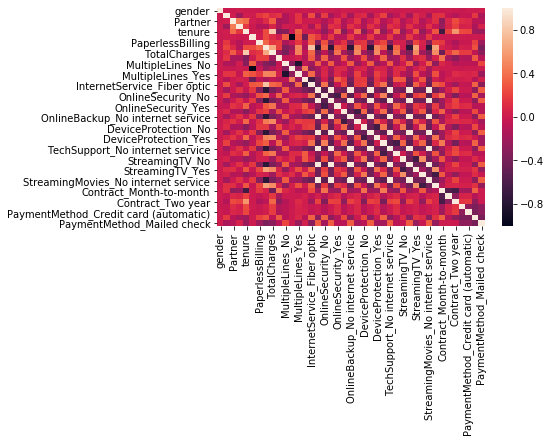

<Figure size 1440x1080 with 0 Axes>

In [116]:
# correlations between all the features
corr = telcom.corr()

# show heapmap of correlations
sns.heatmap(corr)
plt.figure(figsize=(20, 15))

In [65]:
# Get ground truth data
y = telcom['Churn']
# Drop some useless columns
to_drop = ['customerID','Churn']
X = telcom.drop(to_drop, axis=1)
# Splite data into training and testing
from sklearn import model_selection
# Reserve 20% for testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

print('training data has %d observation with %d features'% X_train.shape)
print('test data has %d observation with %d features'% X_test.shape)
# check the propotion of y = 1
print('propotion',y.sum() / y.shape * 100)

training data has 5625 observation with 40 features
test data has 1407 observation with 40 features
propotion [26.57849829]


In [66]:
#standarlization
scaler = StandardScaler()
X1 = scaler.fit_transform(X_train[num_cols])
X2 = scaler.transform(X_test[num_cols])
X_train_num= pd.DataFrame(X1,columns=num_cols)
X_test_num=pd.DataFrame(X2,columns=num_cols)

#dropping original values merging scaled values for numerical columns
x_train_drop= X_train.drop(columns = num_cols,axis = 1).reset_index(drop=True)
x_test_drop=X_test.drop(columns = num_cols,axis = 1).reset_index(drop=True)
X_train=x_train_drop.merge(X_train_num,left_index=True,right_index=True,how = "left")
X_test = x_test_drop.merge(X_test_num,left_index=True,right_index=True,how = "left")

In [67]:
#@title build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression


# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

In [68]:
classifier_logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
# Prediction of test data
classifier_logistic.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [70]:
# Accuracy of test data
classifier_logistic.score(X_test, y_test)

0.8173418621179815

In [71]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    # cprint(cv_score)
    print('Model accuracy of %s is: %.3f'%(model_names[count],cv_score.mean()))
    count += 1

Model accuracy of Logistic Regression is: 0.802
Model accuracy of KNN is: 0.761
Model accuracy of Random Forest is: 0.783


In [72]:
#@title Homework 2
####
## Your Code
####
# SVC
from sklearn.svm import SVC 

classifier_SVC = SVC()

cv_score = model_selection.cross_val_score(classifier_SVC, X_train, y_train, cv=5)
print('Model accuracy of SVM is: %.3f'%(cv_score.mean()))


Model accuracy of SVM is: 0.801


In [73]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [78]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the lambda value(weight) for L1 and L2
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(0.01,0.1,1, 5, 10)#lamda
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': (0.01, 0.1, 1, 5, 10), 'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [79]:
print_grid_search_metrics(Grid_LR)

Best score: 0.802
Best parameters set:
	C: 0.01
	penalty: 'l2'


In [80]:
# best model
best_LR_model = Grid_LR.best_estimator_

In [81]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[3,5,7,10] 
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 10]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [82]:
# best k
print_grid_search_metrics(Grid_KNN)

Best score: 0.779
Best parameters set:
	n_neighbors: 10


In [105]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {'max_depth': [10,30,60,90],
 'min_samples_leaf': [1, 2, 4],
 'n_estimators': [100,200,300]}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [109]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.802
Best parameters set:
	max_depth: 10
	min_samples_leaf: 4
	n_estimators: 300


In [110]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: %0.3f" % accuracy)
    print ("precision is: %0.3f" % precision)
    print ("recall is: %0.3f" % recall)

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['Not','Churn']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Reds'))
        plt.title('Confusion matrix for %s' % classifier)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Random Forest
Accuracy is: 0.812
precision is: 0.684
recall is: 0.523


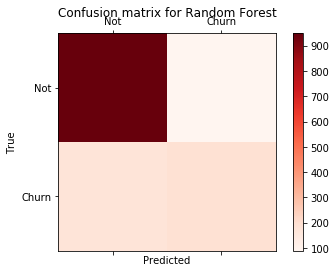

Logistic Regression
Accuracy is: 0.810
precision is: 0.683
recall is: 0.515


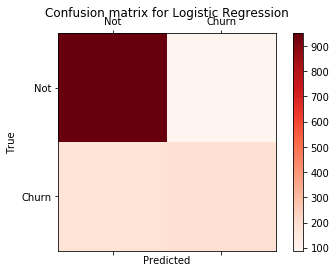

In [112]:
%matplotlib inline

# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
]

draw_confusion_matrices(confusion_matrices)

In [113]:
from sklearn.metrics import roc_curve
from sklearn import metrics

# Use predict_proba to get the probability results of Random Forest
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

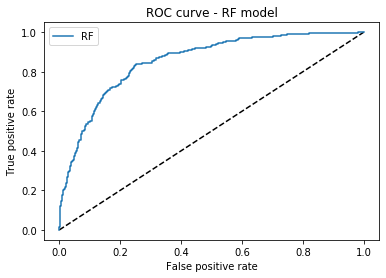

In [114]:
# ROC curve of Random Forest result
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - RF model')
plt.legend(loc='best')
plt.show()

In [115]:
from sklearn import metrics

# AUC score
metrics.auc(fpr_rf,tpr_rf)

0.8548464579058124

In [104]:
# # add L1 regularization to logistic regression
# # check the coef for feature selection
# scaler = StandardScaler()
# X_l1 = scaler.fit_transform(X)
# LRmodel_l1 = LogisticRegression(penalty="l2", C = 0.1)
# LRmodel_l1.fit(X_l1, y)
# LRmodel_l1.coef_[0]
# print ("Logistic Regression (L1) Coefficients")
# for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l1.coef_[0]), \
#                       churn_feat_space.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
#     print (v + ": " + str(k))

In [ ]:
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), churn_feat_space.columns), reverse=True):
    print (v + ": " + str(k))

In [35]:
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 5)
LRmodel_l2.fit(X_l2, y)
LRmodel_l2.coef_[0]
print ("Logistic Regression (L2) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l2.coef_[0]), \
                      churn_feat_space.columns), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
gender,1.000000,-0.001819,-0.001379,0.010349,-0.007515,-0.011902,-0.008545,0.004335,0.007515,-0.008883,0.007584,-0.011189,0.004745,0.010859,0.004745,-0.016328,0.008605,0.004745,-0.013093,-0.003163,0.004745,-0.000807,0.003815,0.004745,-0.008507,0.003088,0.004745,-0.007124,0.006078,0.004745,-0.010105,-0.003251,0.007755,-0.003603,-0.015973,0.001632,0.000844,0.013199,0.005285,-0.013779,0.000048
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.008392,0.156258,0.150541,-0.136377,-0.008392,0.142996,-0.108276,0.254923,-0.182519,0.185145,-0.182519,-0.038576,0.087539,-0.182519,0.066663,0.094403,-0.182519,0.059514,0.205254,-0.182519,-0.060577,0.048664,-0.182519,0.105445,0.034196,-0.182519,0.119842,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987,0.015683,0.219874,0.102411
Partner,-0.001379,0.016957,1.000000,0.452269,0.018397,-0.013957,-0.149982,-0.130028,-0.018397,0.142561,-0.001043,0.001235,-0.000286,-0.129394,-0.000286,0.143346,-0.135626,-0.000286,0.141849,-0.146702,-0.000286,0.153556,-0.108875,-0.000286,0.120206,-0.123394,-0.000286,0.124483,-0.117488,-0.000286,0.118108,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948,0.381912,0.097825,0.319072
Dependents,0.010349,-0.210550,0.452269,1.000000,-0.001078,-0.110131,-0.163128,0.023388,0.001078,-0.024307,0.051593,-0.164101,0.138383,-0.186979,0.138383,0.080786,-0.137421,0.138383,0.023639,-0.128053,0.138383,0.013900,-0.171164,0.138383,0.063053,-0.099912,0.138383,-0.016499,-0.078245,0.138383,-0.038375,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448,0.163386,-0.112343,0.064653
PhoneService,-0.007515,0.008392,0.018397,-0.001078,1.000000,0.016696,0.011691,0.315218,-1.000000,0.279530,-0.452255,0.290183,0.171817,-0.058546,0.171817,-0.091676,-0.092579,0.171817,-0.052133,-0.075421,0.171817,-0.070076,-0.055102,0.171817,-0.095138,-0.123159,0.171817,-0.021383,-0.111273,0.171817,-0.033477,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463,0.007877,0.248033,0.113008
PaperlessBilling,-0.011902,0.156258,-0.013957,-0.110131,0.016696,1.000000,0.191454,-0.151974,-0.016696,0.163746,-0.063390,0.326470,-0.320592,0.267592,-0.320592,-0.004051,0.144218,-0.320592,0.127056,0.166253,-0.320592,0.104079,0.229875,-0.320592,0.037536,0.046715,-0.320592,0.224241,0.058987,-0.320592,0.211583,0.168296,-0.052278,-0.146281,-0.017469,-0.013726,0.208427,-0.203981,0.004823,0.351930,0.157830
Churn,-0.008545,0.150541,-0.149982,-0.163128,0.011691,0.191454,1.000000,-0.032654,-0.011691,0.040033,-0.124141,0.307463,-0.227578,0.342235,-0.227578,-0.171270,0.267595,-0.227578,-0.082307,0.252056,-0.227578,-0.066193,0.336877,-0.227578,-0.164716,0.128435,-0.227578,0.063254,0.130920,-0.227578,0.060860,0.404565,-0.178225,-0.301552,-0.118136,-0.134687,0.301455,-0.090773,-0.354049,0.192858,-0.199484
MultipleLines_No,0.004335,-0.136377,-0.130028,0.023388,0.315218,-0.151974,-0.032654,1.000000,-0.315218,-0.823076,-0.069515,-0.190531,0.309984,-0.118032,0.309984,-0.151678,-0.036126,0.309984,-0.230724,-0.026582,0.309984,-0.240847,-0.114036,0.309984,-0.155534,0.005131,0.309984,-0.267466,0.014149,0.309984,-0.275995,0.086798,0.001694,-0.102756,-0